In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def split_data(dataset, timesteps):
    D = dataset.shape[1]
    if D < timesteps:
        return None
    elif D == timesteps:
        return dataset
    else:
        splitted_data, remaining_data = np.hsplit(dataset, [timesteps])
        remaining_data = split_data(remaining_data, timesteps)
        if remaining_data is not None:
            return np.vstack([splitted_data, remaining_data])
        return splitted_data

In [30]:
normalized_transactions_filepath = "../../datasets/berka_dataset/usable/normalized_transactions.npy"

timesteps = 100
transactions = np.load(normalized_transactions_filepath)
transactions = split_data(transactions, timesteps)
transactions = transactions[np.std(transactions, 1) > float(1e-7)]
print(transactions.shape)

(53888, 100)


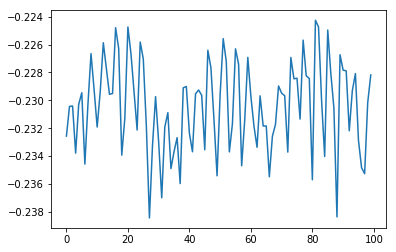

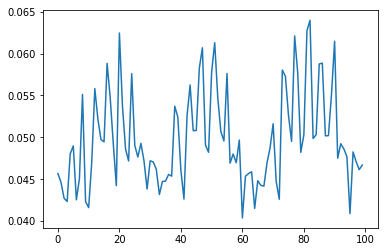

In [60]:
transactions_mean = np.mean(transactions, axis=0)
transactions_variance = np.var(transactions, axis=0)

plt.plot(transactions_mean)
plt.figure()
plt.plot(transactions_variance)

In [35]:
generated_data_filepath = "wgan/2018-04-04_10-50-16/generated_datasets/25000_generated_data.npy"
generated_data = np.load(generated_data_filepath)
print(generated_data.shape)

(100000, 100)


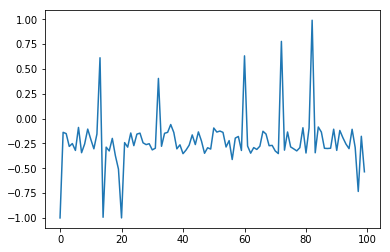

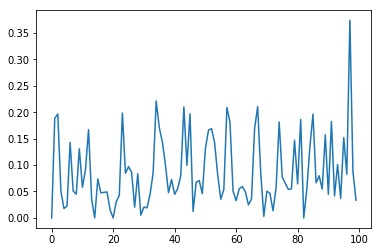

In [61]:
generated_data_mean = np.mean(generated_data, axis=0)
generated_data_variance = np.var(generated_data, axis=0)

plt.plot(generated_data_mean)
plt.figure()
plt.plot(generated_data_variance)

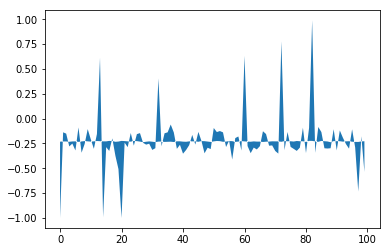

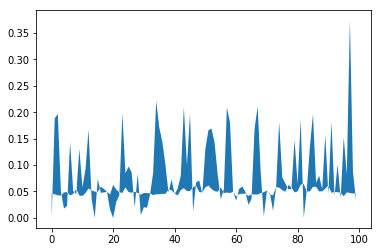

In [62]:
x = np.arange(0.0, 100, 1)

plt.fill_between(x, transactions_mean, generated_data_mean)
plt.figure()
plt.fill_between(x, transactions_variance, generated_data_variance)

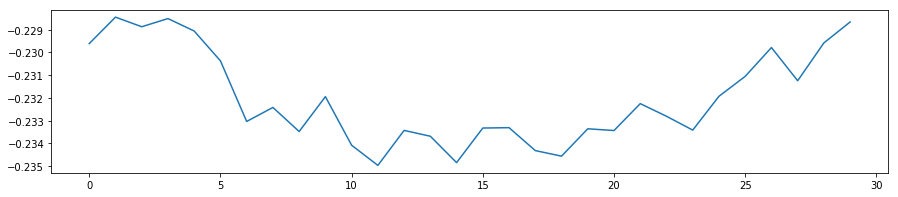

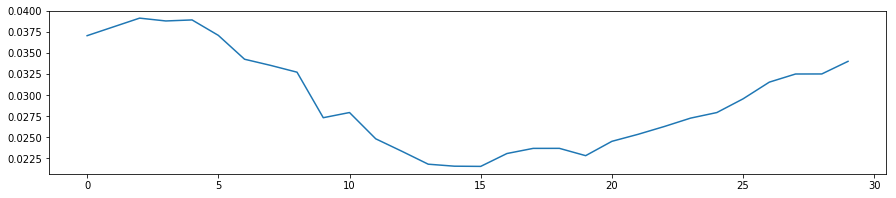

In [74]:
normalized_transactions_filepath = "../../datasets/berka_dataset/usable/normalized_transactions.npy"

timesteps = 30
transactions = np.load(normalized_transactions_filepath)[:, :]
transactions = split_data(transactions, timesteps)

plt.figure(figsize=(15, 3))
plt.plot(np.mean(transactions, 0))
plt.figure(figsize=(15, 3))
plt.plot(np.var(transactions,0))